# Contributing Students:
- Aman Abuelayyan - 202010152
- Fakhri Abubaih - 202010076
- Nada Asaad - 202112529
- Safwat Suliman - 202012322

# Important Notes:
- Better to be launched via Google CoLab.
- If launched through Google CoLab, upload the `.xlsx` file first.
- If launched through Jupyter Notebook, change the path when reading the file via read_excel('path').
- First launch through Google CoLab will require you to Restart the session to implement `pip` installation for the PyCaret libraries. So, please conform to the process and press on `Restart Session`, and run the cells again.

# PPV Prediction Analysis using PyCaret

This notebook demonstrates the prediction of PPV values using machine learning models from the PyCaret library.

## Setup and Data Loading

In [1]:
pip install pycaret

In [2]:
# Import required libraries
import pandas as pd
import numpy as np
from pycaret.regression import *

## Data Preparation
Load and prepare the dataset for analysis

In [3]:
# Create DataFrame from the data
data = pd.DataFrame(pd.read_excel('/content/TG_T_CashValues_Rel.xlsx'), columns=['Gender', 'Age', 'Dur', 'PPV'])

# Display first few rows of the dataset
display(data.head())

# Display basic statistics
display(data.describe())

# Display all information to find if there are null-values
display(data.info())

,Gender,Age,Dur,PPV
0,Male,0,20,15.198437
1,Male,0,21,15.741015
2,Male,0,22,16.267189
3,Male,0,23,16.777448
4,Male,0,24,17.272269


,Age,Dur,PPV
count,5270.000000,5270.000000,5270.000000
mean,31.294118,22.882353,14.858158
std,18.671548,13.793388,7.025862
min,0.000000,1.000000,1.000000
25%,16.000000,11.000000,9.374980
50%,30.000000,22.000000,15.703883
75%,45.000000,34.000000,20.953996
max,80.000000,50.000000,26.024118


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5270 entries, 0 to 5269
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Gender  5270 non-null   object 
 1   Age     5270 non-null   int64  
 2   Dur     5270 non-null   int64  
 3   PPV     5270 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 164.8+ KB


None

## Model Setup
Initialize PyCaret setup with appropriate parameters

In [4]:
# Initialize PyCaret setup
reg_setup = setup(
    data=data,
    target='PPV',
    train_size=0.8,
    fold=5,  # 5-fold cross-validation
    numeric_features=['Age', 'Dur'],
    session_id=123,  # for reproducibility/ranodmization
    use_gpu=True  # if available
)

[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

,Description,Value
0,Session id,123
1,Target,PPV
2,Target type,Regression
3,Original data shape,"(5270, 4)"
4,Transformed data shape,"(5270, 4)"
5,Transformed train set shape,"(4216, 4)"
6,Transformed test set shape,"(1054, 4)"
7,Numeric features,2
8,Categorical features,1
9,Preprocess,True


[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of data points in the train set: 2, number of used features: 0
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Warning] There are no meaningful features which satisfy the provided configuration. Decreasing Dataset parameters min_data_in_bin or min_data_in_leaf and re-constructing Dataset might resolve this warning.
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 0
[LightGBM] [Info] Number of

## Model Comparison
Compare different models to find the best performer

In [5]:
# Compare models to find the best performer
best_models = compare_models(
    sort='RMSE',  # Sort by RMSE
    n_select=3  # Show top 3 models
)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
et,Extra Trees Regressor,0.0106,0.0013,0.0344,1.0000,0.0028,0.0008,1.0040
xgboost,Extreme Gradient Boosting,0.0316,0.0034,0.0580,0.9999,0.0040,0.0024,0.3320
rf,Random Forest Regressor,0.0368,0.0048,0.0685,0.9999,0.0055,0.0029,1.1280
lightgbm,Light Gradient Boosting Machine,0.0363,0.0053,0.0725,0.9999,0.0051,0.0029,0.1300
dt,Decision Tree Regressor,0.0539,0.0103,0.1012,0.9998,0.0068,0.0037,0.1040
gbr,Gradient Boosting Regressor,0.0790,0.0173,0.1314,0.9996,0.0117,0.0081,0.6060
knn,K Neighbors Regressor,0.1733,0.0580,0.2408,0.9988,0.0390,0.0262,0.1100
ada,AdaBoost Regressor,0.5488,0.4260,0.6525,0.9913,0.0939,0.0754,0.2680
ridge,Ridge Regression,1.1014,1.7479,1.3217,0.9644,0.1958,0.1837,0.1080
lar,Least Angle Regression,1.1014,1.7479,1.3217,0.9644,0.1958,0.1837,0.1160


Processing:   0%|          | 0/83 [00:00<?, ?it/s]

## Model Training and Tuning
Train and tune the selected model (LightGBM)

In [6]:
# Select and create the LightGBM model
lgbm = create_model('lightgbm')

# Tune the model using grid search
tuned_lgbm = tune_model(lgbm, optimize='RMSE')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.0343,0.0045,0.0668,0.9999,0.0046,0.0026
1,0.0355,0.0047,0.0688,0.9999,0.0047,0.0028
2,0.0384,0.0062,0.0784,0.9999,0.0055,0.0029
3,0.0372,0.0054,0.0738,0.9999,0.0049,0.0028
4,0.0362,0.0055,0.0744,0.9999,0.0061,0.0032
Mean,0.0363,0.0053,0.0725,0.9999,0.0051,0.0029
Std,0.0014,0.0006,0.0042,0.0000,0.0006,0.0002


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,0.1229,0.0417,0.2041,0.9992,0.0437,0.0238
1,0.1315,0.0468,0.2164,0.9991,0.0488,0.0275
2,0.1247,0.0442,0.2103,0.9990,0.0440,0.0234
3,0.1260,0.0441,0.2099,0.9991,0.0463,0.0259
4,0.1230,0.0437,0.2091,0.9991,0.0505,0.0299
Mean,0.1256,0.0441,0.2100,0.9991,0.0467,0.0261
Std,0.0032,0.0016,0.0039,0.0001,0.0027,0.0024


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


Original model was better than the tuned model, hence it will be returned. NOTE: The display metrics are for the tuned model (not the original one).


## Model Evaluation
Evaluate model performance using various metrics

In [7]:
# Get model performance metrics
print("Model Performance Metrics:")
print("-------------------------")
print(pull())

# Cross-validation results
cv_scores = evaluate_model(tuned_lgbm)
# cv_results = cross_validate(tuned_lgbm)
# print("\nCross-Validation Results:")
# print("------------------------")
# print("RMSE:", np.mean([x['RMSE'] for x in cv_results]))
# print("MAE:", np.mean([x['MAE'] for x in cv_results]))
# print("R2:", np.mean([x['R2'] for x in cv_results]))

Model Performance Metrics:
-------------------------
         MAE     MSE    RMSE      R2   RMSLE    MAPE
Fold                                                
0     0.1229  0.0417  0.2041  0.9992  0.0437  0.0238
1     0.1315  0.0468  0.2164  0.9991  0.0488  0.0275
2     0.1247  0.0442  0.2103  0.9990  0.0440  0.0234
3     0.1260  0.0441  0.2099  0.9991  0.0463  0.0259
4     0.1230  0.0437  0.2091  0.9991  0.0505  0.0299
Mean  0.1256  0.0441  0.2100  0.9991  0.0467  0.0261
Std   0.0032  0.0016  0.0039  0.0001  0.0027  0.0024


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

## Feature Importance Analysis
Analyze the importance of different features

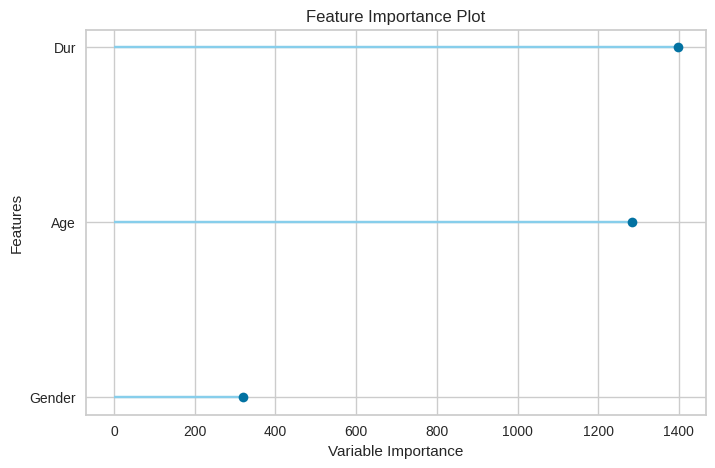

In [8]:
# Plot feature importance
plot_model(tuned_lgbm, plot='feature')

## Save Model (Optional)
Save the trained model for future use

In [9]:
# Save the model
save_model(tuned_lgbm, 'ppv_prediction_model')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=Memory(location=None),
          steps=[('numerical_imputer',
                  TransformerWrapper(include=['Age', 'Dur'],
                                     transformer=SimpleImputer())),
                 ('categorical_imputer',
                  TransformerWrapper(include=['Gender'],
                                     transformer=SimpleImputer(strategy='most_frequent'))),
                 ('ordinal_encoding',
                  TransformerWrapper(include=['Gender'],
                                     transformer=OrdinalEncoder(cols=['Gender'],
                                                                handle_missing='return_nan',
                                                                mapping=[{'col': 'Gender',
                                                                          'data_type': dtype('O'),
                                                                          'mapping': Female    0
 Male      1
 NaN      -1
 dtype: int64}]))),
